In [1]:
import torch
import numpy as np
from src.model import Net
from matplotlib.image import imread
import matplotlib.pyplot as plt

In [2]:
model = Net()
model.eval()

Net(
  (conv1): Conv2d(3, 30, kernel_size=(10, 10), stride=(1, 1))
  (conv2): Conv2d(30, 100, kernel_size=(10, 10), stride=(1, 1))
  (mp1): MaxPool2d(kernel_size=6, stride=6, padding=0, dilation=1, ceil_mode=False)
  (mp2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=105800, out_features=5000, bias=True)
  (fc2): Linear(in_features=5000, out_features=1000, bias=True)
  (fc3): Linear(in_features=1000, out_features=500, bias=True)
  (fc4): Linear(in_features=500, out_features=50, bias=True)
  (fc5): Linear(in_features=50, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=2, bias=True)
)

In [3]:
checkpoint = torch.load('./model_save')
model.load_state_dict(checkpoint)

(720, 1280, 3)


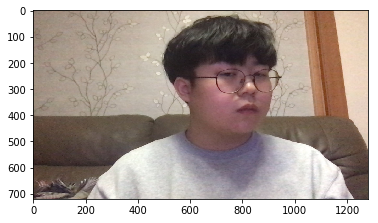

In [4]:
img = imread('./assets/test.jpg')
print(img.shape)
plt.imshow(img)

In [5]:
img = np.moveaxis(img, -1, 0)
input = torch.tensor([img])
output = model.forward(input)
result = output.data.max(1, keepdim=True)[1][0][0].item()

if result == 1: 
    print('prediction: left')
else:
    print('prediction: right')

# ** 참고, 실제 학습데이터는 좌우반전된 데이터를 사용하기 때문에 코드에서는 반대로 매핑되어있음.

prediction: right
